In [1]:
# iris_classification.py
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load
iris = load_iris()
X, y = iris.data, iris.target  # 3 classes: 0,1,2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression (multiclass handled by default)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# KNN (try one k)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("KNN Accuracy (k=5):", accuracy_score(y_test, y_pred_knn))

print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


Logistic Regression Accuracy: 0.9666666666666667
KNN Accuracy (k=5): 1.0

Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

KNN Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted

In [2]:
# confusion_manual_check.py
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

actual = [1,0,1,1,0,0,1]
predicted = [1,0,0,1,0,1,1]

cm = confusion_matrix(actual, predicted)
print("Confusion matrix (sklearn):\n", cm)   # rows: actual 0 then 1; cols: pred 0 then 1

print("Accuracy:", accuracy_score(actual, predicted))
print("Precision (class 1):", precision_score(actual, predicted))
print("Recall (class 1):", recall_score(actual, predicted))
print("F1 (class 1):", f1_score(actual, predicted))


Confusion matrix (sklearn):
 [[2 1]
 [1 3]]
Accuracy: 0.7142857142857143
Precision (class 1): 0.75
Recall (class 1): 0.75
F1 (class 1): 0.75


[(1, 0.9736842105263158), (3, 0.9736842105263158), (5, 0.9473684210526315), (7, 0.9473684210526315), (9, 0.9736842105263158), (11, 0.9736842105263158)]


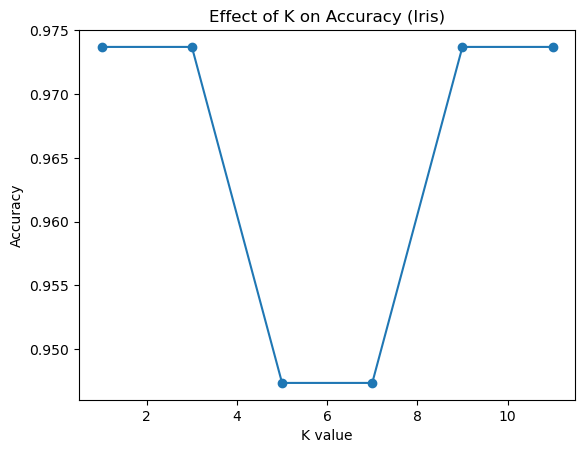

In [3]:
# knn_k_vs_accuracy.py
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

k_values = [1,3,5,7,9,11]
acc = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

print(list(zip(k_values, acc)))

plt.plot(k_values, acc, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Effect of K on Accuracy (Iris)")
plt.show()


In [4]:
# knn_from_scratch.py
import numpy as np
from collections import Counter

class SimpleKNN:
    def __init__(self, k=3):
        self.k = k
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    def _distances(self, x):
        # Euclidean distances
        return np.sqrt(np.sum((self.X_train - x)**2, axis=1))
    def predict_one(self, x):
        dists = self._distances(x)
        idx = np.argsort(dists)[:self.k]
        votes = self.y_train[idx]
        most_common = Counter(votes).most_common(1)[0][0]
        return most_common
    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])

# Quick test on iris
if __name__ == "__main__":
    from sklearn.datasets import load_iris
    from sklearn.model_selection import train_test_split
    X,y = load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)
    model = SimpleKNN(k=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", np.mean(y_pred == y_test))


Accuracy: 0.9736842105263158


In [5]:
# logistic_from_scratch.py
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class SimpleLogistic:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0],1)), X])  # add bias term
        self.w = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            z = X.dot(self.w)
            preds = sigmoid(z)
            # gradient of log-loss
            grad = X.T.dot(preds - y) / len(y)
            self.w -= self.lr * grad
    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0],1)), X])
        return sigmoid(X.dot(self.w))
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# Quick usage on synthetic dataset (or use two classes from iris)
if __name__ == "__main__":
    from sklearn.datasets import load_iris
    X,y = load_iris(return_X_y=True)
    # reduce to binary (class 0 vs not)
    mask = (y != 2)
    X2, y2 = X[mask], (y[mask] == 1).astype(int)  # example: class1 vs class0
    from sklearn.model_selection import train_test_split
    Xtr,Xte,ytr,yte = train_test_split(X2,y2,test_size=0.25,random_state=42, stratify=y2)
    model = SimpleLogistic(lr=0.5, epochs=2000)
    model.fit(Xtr, ytr)
    preds = model.predict(Xte)
    print("Accuracy:", np.mean(preds == yte))


Accuracy: 1.0


In [6]:
# my_confusion_matrix.py
def my_confusion_matrix(actual, predicted):
    tn = fp = fn = tp = 0
    for a, p in zip(actual, predicted):
        if a == 1 and p == 1:
            tp += 1
        elif a == 0 and p == 0:
            tn += 1
        elif a == 0 and p == 1:
            fp += 1
        elif a == 1 and p == 0:
            fn += 1
    return tn, fp, fn, tp

# Test
if __name__ == "__main__":
    actual = [1,0,1,1,0,0,1]
    pred =   [1,0,0,1,0,1,1]
    print(my_confusion_matrix(actual, pred))  # should print (2,1,1,3)


(2, 1, 1, 3)


In [7]:
# tiny_spam_example.py
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# toy dataset: [word_freq_offer, link_count, message_length]
X = np.array([
    [3, 1, 200],
    [0, 0, 50],
    [1, 1, 120],
    [0, 0, 40],
    [5, 2, 300],
    [0, 0, 60],
    [2, 1, 150],
    [4, 2, 250],
    [0, 0, 35],
    [1, 0, 90],
])
y = np.array([1,0,1,0,1,0,1,1,0,0])  # 1=spam, 0=not spam

model = LogisticRegression()
model.fit(X, y)
pred = model.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y, pred))
print(classification_report(y, pred))


Confusion Matrix:
 [[5 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [8]:
# tiny_diabetes_example.py
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# Each row: [glucose, age, bmi, insulin]; labels: 1 = disease, 0=no disease
X = [
    [150, 50, 30, 120],
    [85, 25, 22, 80],
    [130, 45, 28, 100],
    [90, 30, 24, 70],
    [160, 55, 33, 140],
    [95, 40, 26, 90],
    [140, 48, 31, 110],
    [80, 22, 21, 60],
]
y = [1,0,1,0,1,0,1,0]

model = LogisticRegression()
model.fit(X, y)
pred = model.predict(X)

print("Precision (disease):", precision_score(y, pred))
print("Recall (disease):", recall_score(y, pred))
print("Confusion matrix:\n", __import__('sklearn').metrics.confusion_matrix(y, pred))


Precision (disease): 1.0
Recall (disease): 1.0
Confusion matrix:
 [[4 0]
 [0 4]]


In [9]:
# churn_knn_toy.py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# features: [monthly_charges, contract_months, complaints_count, age]
X = [
    [80, 1, 3, 30],
    [40, 12, 0, 45],
    [70, 3, 1, 25],
    [35, 24, 0, 50],
    [90, 1, 4, 23],
    [55, 6, 2, 33],
    [45, 12, 0, 42],
    [85, 2, 3, 29]
]
y = [1,0,1,0,1,1,0,1]  # 1 = churn

for k in [1,3,5]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X,y)
    print("k=",k, "report:\n", classification_report(y, model.predict(X)))


k= 1 report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

k= 3 report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

k= 5 report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.0

In [10]:
# mnist_knn_experiment.py
import numpy as np
from sklearn.datasets import fetch_openml, load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

def load_mnist_fallback(n_samples=None, random_state=42):
    """Try to fetch MNIST; fall back to sklearn.load_digits if offline."""
    try:
        mnist = fetch_openml('mnist_784', version=1, as_frame=False)
        X, y = mnist['data'], mnist['target'].astype(int)
    except Exception as e:
        print("fetch_openml failed, falling back to load_digits (smaller dataset). Error:", e)
        digits = load_digits()
        X, y = digits.data, digits.target
    if n_samples is not None and n_samples < X.shape[0]:
        rng = np.random.RandomState(random_state)
        idx = rng.choice(np.arange(X.shape[0]), size=n_samples, replace=False)
        X, y = X[idx], y[idx]
    return X, y

def run_experiment(n_samples=10000, use_pca=True, pca_components=50, test_size=0.2):
    print("Loading data...")
    X, y = load_mnist_fallback(n_samples=n_samples)
    print("Data shape:", X.shape)
    # Normalize pixel values to 0-1 if values > 1
    if X.max() > 1.0:
        X = X / 255.0

    if use_pca:
        print(f"Applying PCA -> {pca_components} components (reducing dimensionality)...")
        pca = PCA(n_components=pca_components, random_state=0)
        X = pca.fit_transform(X)
        print("After PCA shape:", X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

    k_list = [3, 5, 7]
    results = {}
    for k in k_list:
        print("\nTraining KNN with k =", k)
        t0 = time.time()
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)  # use parallel jobs
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        t1 = time.time()
        print(f"k={k} Accuracy: {acc:.4f}  (train+predict time: {t1-t0:.1f}s)")
        results[k] = {'accuracy': acc, 'pred': y_pred}
        # Optionally show a confusion matrix and classification report for best K
        print("Classification report (k={}):".format(k))
        print(classification_report(y_test, y_pred, digits=4))
    # Which K is best?
    best_k = max(results.keys(), key=lambda kk: results[kk]['accuracy'])
    print("\nBest k by accuracy:", best_k, "with accuracy:", results[best_k]['accuracy'])
    print("Confusion matrix for best k:")
    print(confusion_matrix(y_test, results[best_k]['pred']))
    return results

if __name__ == "__main__":
    # Configuration: reduce n_samples if you want quicker runs; set use_pca=False to run on raw pixels.
    results = run_experiment(n_samples=10000, use_pca=True, pca_components=50, test_size=0.2)


Loading data...
Data shape: (10000, 784)
Applying PCA -> 50 components (reducing dimensionality)...
After PCA shape: (10000, 50)
Train shape: (8000, 50) Test shape: (2000, 50)

Training KNN with k = 3
k=3 Accuracy: 0.9455  (train+predict time: 0.9s)
Classification report (k=3):
              precision    recall  f1-score   support

           0     0.9697    0.9746    0.9722       197
           1     0.9350    1.0000    0.9664       230
           2     0.9485    0.9485    0.9485       194
           3     0.9327    0.9372    0.9349       207
           4     0.9337    0.9337    0.9337       181
           5     0.9620    0.9465    0.9542       187
           6     0.9453    0.9896    0.9669       192
           7     0.9522    0.9431    0.9476       211
           8     0.9659    0.8763    0.9189       194
           9     0.9163    0.8986    0.9073       207

    accuracy                         0.9455      2000
   macro avg     0.9461    0.9448    0.9451      2000
weighted avg     

In [14]:
# corrected_bank_loan_classification.py
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def create_synthetic_loan_data(n=300, random_state=42):
    rng = np.random.RandomState(random_state)
    incomes = rng.normal(loc=50000, scale=15000, size=n).clip(10000, 200000)
    credit_scores = rng.normal(loc=650, scale=75, size=n).clip(300, 850)
    loan_amounts = rng.normal(loc=15000, scale=8000, size=n).clip(1000, 100000)
    # Add an 'age' column to match some pipelines expecting it; not used directly in original rule
    ages = rng.normal(loc=35, scale=10, size=n).clip(18, 80).astype(int)
    employment = rng.choice(['salaried', 'self-employed', 'unemployed'], size=n, p=[0.6, 0.3, 0.1])

    dti_ratio = loan_amounts / (incomes + 1e-9)
    score = (credit_scores - 600)/200 - 5*dti_ratio + np.where(employment=='unemployed', -0.5, 0.1)
    prob = 1 / (1 + np.exp(-score))
    labels = (prob > 0.5).astype(int)

    df = pd.DataFrame({
        'age': ages,
        'income': incomes.astype(int),
        'credit_score': credit_scores.astype(int),
        'loan_amount': loan_amounts.astype(int),
        'employment_status': employment,
        'approve': labels
    })
    return df

def make_onehot_encoder_compatible():
    """Return a OneHotEncoder instantiated with the right sparse arg for sklearn version."""
    try:
        # sklearn >=1.2 uses sparse_output
        ohe = OneHotEncoder(drop='first', sparse_output=False)
    except TypeError:
        # older sklearn uses sparse
        ohe = OneHotEncoder(drop='first', sparse=False)
    return ohe

def train_and_eval(df, target_col='approve'):
    # Build X and y from dataframe
    if target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' not found in dataframe.")

    # If user expects different numeric features (e.g., 'age'), prefer columns present in df
    # Default candidate numeric features (common). We'll pick those present.
    candidate_numeric = ['age', 'income', 'credit_score', 'loan_amount']
    numeric_features = [c for c in candidate_numeric if c in df.columns]
    if not numeric_features:
        # fallback to all numeric columns except target
        numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
        numeric_features = [c for c in numeric_features if c != target_col]

    # For categorical, prefer 'employment_status' if present, else any object/categorical col
    if 'employment_status' in df.columns:
        categorical_features = ['employment_status']
    else:
        categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
        # remove target if it's categorical (target should be numeric)
        categorical_features = [c for c in categorical_features if c != target_col]

    print("Using numeric features:", numeric_features)
    print("Using categorical features:", categorical_features)

    X = df[numeric_features + categorical_features] if categorical_features else df[numeric_features]
    y = df[target_col].values

    # Define transformers
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    ohe = make_onehot_encoder_compatible()
    categorical_transformer = Pipeline(steps=[
        ('onehot', ohe)
    ]) if categorical_features else None

    transformers = []
    transformers.append(('num', numeric_transformer, numeric_features))
    if categorical_features:
        transformers.append(('cat', categorical_transformer, categorical_features))

    preprocessor = ColumnTransformer(transformers=transformers, remainder='drop')

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
    print("Train size:", X_train.shape, "Test size:", X_test.shape)

    # Logistic Regression pipeline
    pipe_lr = Pipeline(steps=[('pre', preprocessor),
                              ('clf', LogisticRegression(max_iter=200))])
    pipe_lr.fit(X_train, y_train)
    pred_lr = pipe_lr.predict(X_test)
    print("\nLogistic Regression Results")
    print("Accuracy:", accuracy_score(y_test, pred_lr))
    print("Confusion matrix:\n", confusion_matrix(y_test, pred_lr))
    print("Classification report:\n", classification_report(y_test, pred_lr, digits=4))

    # KNN pipeline (with scaled features from same preprocessor)
    pipe_knn = Pipeline(steps=[('pre', preprocessor),
                               ('clf', KNeighborsClassifier(n_neighbors=5))])
    pipe_knn.fit(X_train, y_train)
    pred_knn = pipe_knn.predict(X_test)
    print("\nKNN Results (k=5)")
    print("Accuracy:", accuracy_score(y_test, pred_knn))
    print("Confusion matrix:\n", confusion_matrix(y_test, pred_knn))
    print("Classification report:\n", classification_report(y_test, pred_knn, digits=4))

    # Show feature transformation column names if categorical transformer exists
    if categorical_features:
        # access OHE inside pipeline (preprocessor -> named_transformers_ -> 'cat' -> 'onehot')
        pre = pipe_lr.named_steps['pre']
        # For sklearn versions where ColumnTransformer stores transformers differently, use named_transformers_
        try:
            ohe_step = pre.named_transformers_['cat'].named_steps['onehot']
            cat_cols = list(ohe_step.get_feature_names_out(categorical_features))
        except Exception:
            # fallback: create from fit transform shapes
            cat_cols = [f"{categorical_features[0]}_x{i}" for i in range(pre.transformers_[1][1].named_steps['onehot'].transform(
                df[categorical_features].iloc[:1]).shape[1])]
        print("\nFeature columns after preprocessing:", numeric_features + cat_cols)
    else:
        print("\nFeature columns after preprocessing:", numeric_features)

if __name__ == "__main__":
    df = create_synthetic_loan_data(n=600)
    print(df.head())
    train_and_eval(df)


   age  income  credit_score  loan_amount employment_status  approve
0   54   57450           706        16001     self-employed        0
1   34   47926           580        11564          salaried        0
2   27   59715           715        15978          salaried        0
3   19   72845           751        19346        unemployed        0
4   18   46487           681        15390          salaried        0
Using numeric features: ['age', 'income', 'credit_score', 'loan_amount']
Using categorical features: ['employment_status']
Train size: (450, 5) Test size: (150, 5)

Logistic Regression Results
Accuracy: 0.9866666666666667
Confusion matrix:
 [[139   0]
 [  2   9]]
Classification report:
               precision    recall  f1-score   support

           0     0.9858    1.0000    0.9929       139
           1     1.0000    0.8182    0.9000        11

    accuracy                         0.9867       150
   macro avg     0.9929    0.9091    0.9464       150
weighted avg     0.9869   

=== Head of dataset ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



=== Summary statistics ===


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0



=== Class counts ===


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

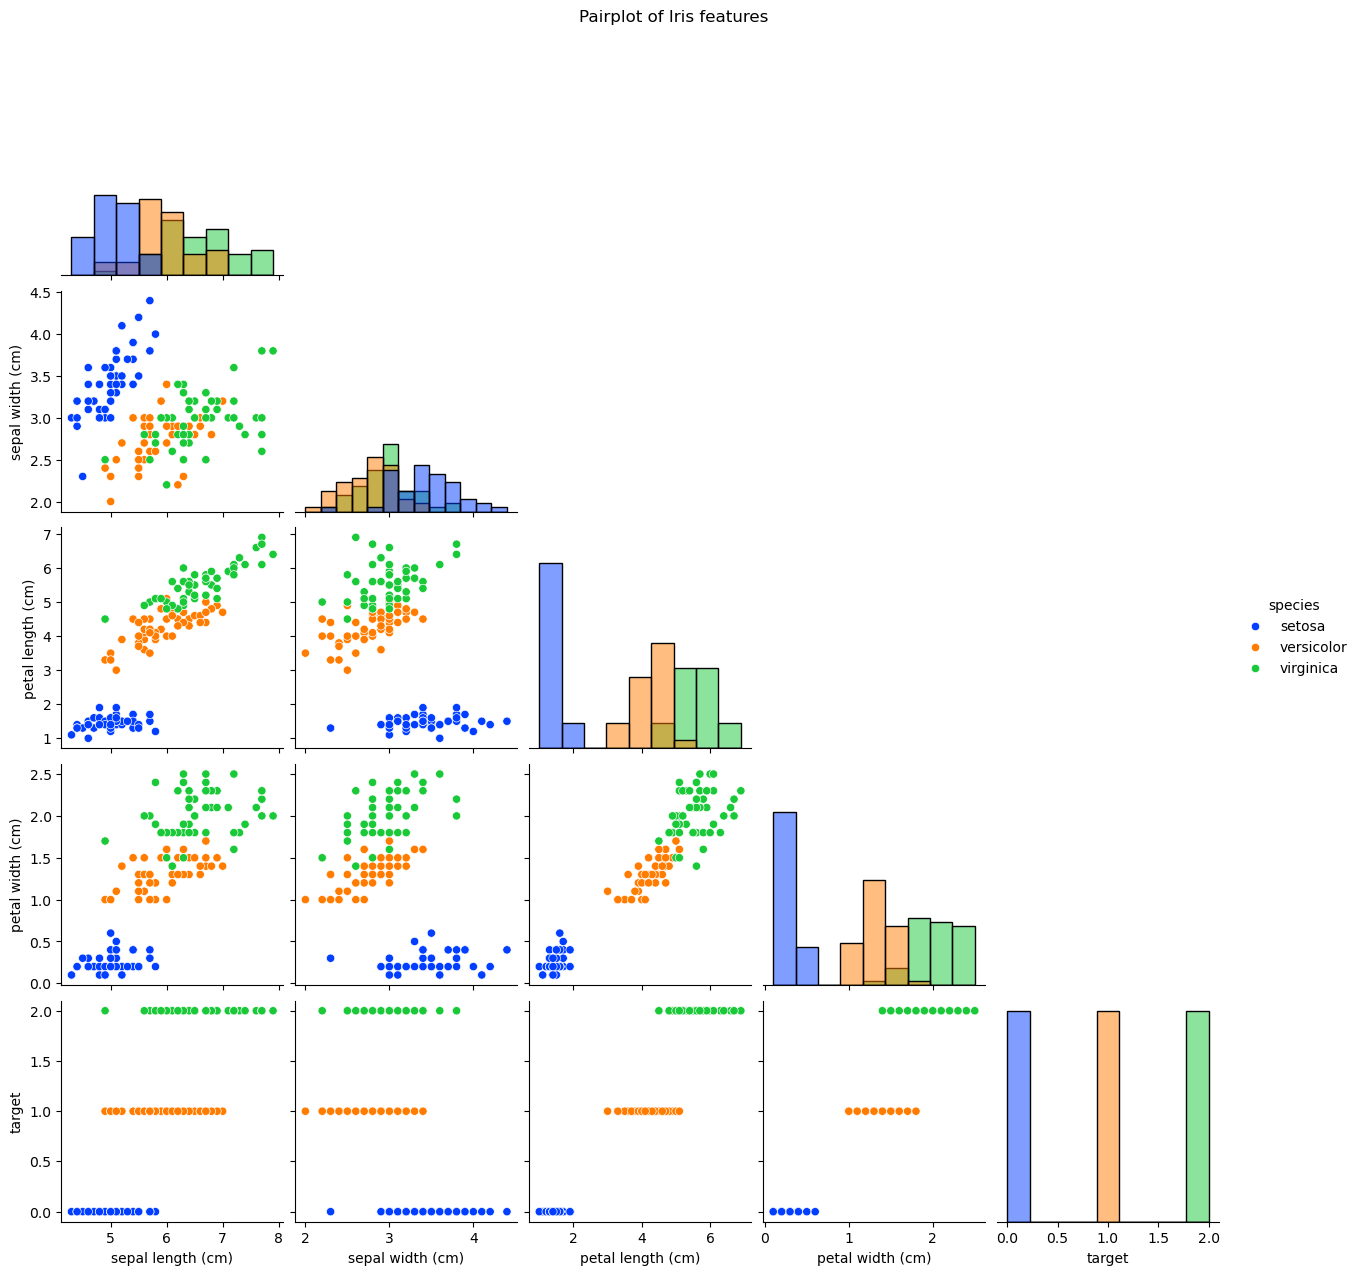

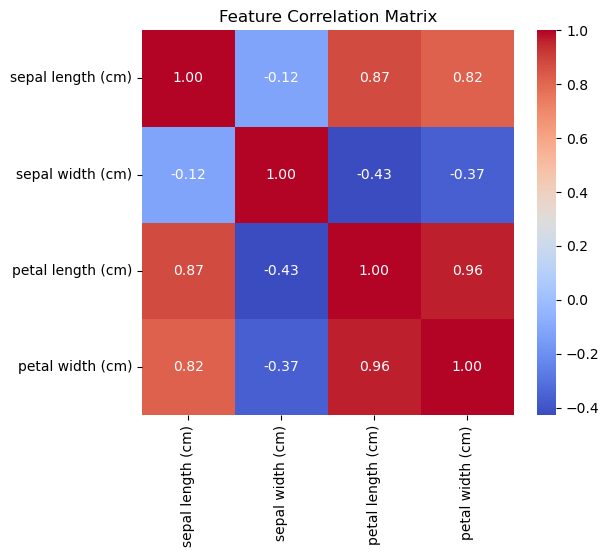


Train shape: (120, 4), Test shape: (30, 4)

Logistic Regression test accuracy: 0.9333

Logistic Regression classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


KNN (k=5) test accuracy: 0.9333

KNN (k=5) classification report:


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

k=1 CV-accuracy: 0.9417 (std 0.0204)
k=3 CV-accuracy: 0.9667 (std 0.0167)
k=5 CV-accuracy: 0.9583 (std 0.0264)
k=7 CV-accuracy: 0.9333 (std 0.0204)
k=9 CV-accuracy: 0.9583 (std 0.0264)
k=11 CV-accuracy: 0.9500 (std 0.0408)
k=13 CV-accuracy: 0.9500 (std 0.0312)
k=15 CV-accuracy: 0.9250 (std 0.0167)


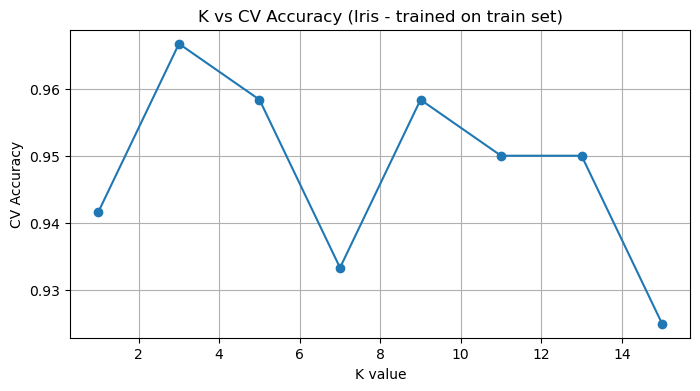


Best k by CV on train set: 3 (CV acc = 0.9667)

Best-KNN (k=3) test accuracy: 0.9333

Best-KNN classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Manual Confusion Matrix (Logistic Regression) - rows=actual, cols=predicted
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          1
virginica        0           1          9

Sklearn Confusion Matrix (LR):
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          1
virginica        0           1          9

Manual Confusion Matrix (Best KNN):
            setosa

In [17]:
# iris_classification_complete.py
# Paste this whole block into one Jupyter cell and run.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)

# ---------------------------
# 1) Load data & quick EDA
# ---------------------------
iris = load_iris(as_frame=True)
df = iris.frame.copy()  # dataframe with feature columns and target as 'target'
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))  # add species name column

print("=== Head of dataset ===")
display(df.head())

print("\n=== Summary statistics ===")
display(df.describe().T)

print("\n=== Class counts ===")
display(df['species'].value_counts())

# Pairplot (visual EDA)
sns.pairplot(df, hue='species', corner=True, diag_kind='hist', palette='bright')
plt.suptitle("Pairplot of Iris features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[iris.feature_names].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# ---------------------------
# 2) Prepare train/test split
# ---------------------------
X = df[iris.feature_names].values
y = df['target'].values  # numeric labels 0,1,2

# stratify to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")

# ---------------------------
# 3) Train Logistic Regression
# ---------------------------
# Use pipeline (scaling + logistic). For LR scaling helps numeric stability.
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs', random_state=42))
])
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression test accuracy: {acc_lr:.4f}")

print("\nLogistic Regression classification report:")
print(classification_report(y_test, y_pred_lr, target_names=iris.target_names))

# ---------------------------
# 4) Train KNN (default k=5) and Tune K
# ---------------------------
# KNN must use scaled features
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5, n_jobs=-1))
])
pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nKNN (k=5) test accuracy: {acc_knn:.4f}")

print("\nKNN (k=5) classification report:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

# Tune K values with cross-validation (Stratified)
k_values = [1,3,5,7,9,11,13,15]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
k_scores = []

for k in k_values:
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k, n_jobs=-1))])
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    k_scores.append(scores.mean())
    print(f"k={k} CV-accuracy: {scores.mean():.4f} (std {scores.std():.4f})")

# Plot K vs CV accuracy
plt.figure(figsize=(8,4))
plt.plot(k_values, k_scores, marker='o')
plt.xlabel('K value')
plt.ylabel('CV Accuracy')
plt.title('K vs CV Accuracy (Iris - trained on train set)')
plt.grid(True)
plt.show()

best_k = k_values[int(np.argmax(k_scores))]
print(f"\nBest k by CV on train set: {best_k} (CV acc = {max(k_scores):.4f})")

# Retrain best K on full training set and evaluate on test
best_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1))])
best_knn.fit(X_train, y_train)
y_pred_bestknn = best_knn.predict(X_test)
acc_bestknn = accuracy_score(y_test, y_pred_bestknn)
print(f"\nBest-KNN (k={best_k}) test accuracy: {acc_bestknn:.4f}")
print("\nBest-KNN classification report:")
print(classification_report(y_test, y_pred_bestknn, target_names=iris.target_names))

# ---------------------------
# 5) Compute confusion matrix manually (multiclass)
# ---------------------------
def manual_confusion_matrix(actual, predicted, labels=None):
    """
    Create a confusion matrix manually for multiclass labels.
    Returns a (n_labels x n_labels) numpy array where rows = actual, cols = predicted.
    """
    if labels is None:
        labels = np.unique(np.concatenate([actual, predicted]))
    label_to_index = {lab: idx for idx, lab in enumerate(labels)}
    mat = np.zeros((len(labels), len(labels)), dtype=int)
    for a, p in zip(actual, predicted):
        mat[label_to_index[a], label_to_index[p]] += 1
    return mat, labels

# Manual CM for Logistic Regression
cm_lr_manual, labels = manual_confusion_matrix(y_test, y_pred_lr, labels=np.array([0,1,2]))
print("\nManual Confusion Matrix (Logistic Regression) - rows=actual, cols=predicted")
print(pd.DataFrame(cm_lr_manual, index=iris.target_names, columns=iris.target_names))

# Verify with sklearn
print("\nSklearn Confusion Matrix (LR):")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_lr), index=iris.target_names, columns=iris.target_names))

# Manual CM for best KNN
cm_knn_manual, _ = manual_confusion_matrix(y_test, y_pred_bestknn, labels=np.array([0,1,2]))
print("\nManual Confusion Matrix (Best KNN):")
print(pd.DataFrame(cm_knn_manual, index=iris.target_names, columns=iris.target_names))

print("\nSklearn Confusion Matrix (Best KNN):")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_bestknn), index=iris.target_names, columns=iris.target_names))

# ---------------------------
# 6) Compare precision / recall across models
# ---------------------------
def per_class_metrics(actual, predicted, labels):
    # returns dict[label] = {precision, recall, f1, support}
    report = {}
    for i, lab in enumerate(labels):
        # True positives: mat[i,i]
        tp = np.sum((actual == lab) & (predicted == lab))
        fp = np.sum((actual != lab) & (predicted == lab))
        fn = np.sum((actual == lab) & (predicted != lab))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
        support = np.sum(actual == lab)
        report[lab] = {'precision': precision, 'recall': recall, 'f1': f1, 'support': support}
    return report

labels = np.array([0,1,2])
metrics_lr = per_class_metrics(y_test, y_pred_lr, labels)
metrics_knn = per_class_metrics(y_test, y_pred_bestknn, labels)

print("\nPer-class metrics (Logistic Regression):")
for lab, m in metrics_lr.items():
    print(f"{iris.target_names[lab]}: precision={m['precision']:.3f}, recall={m['recall']:.3f}, f1={m['f1']:.3f}, support={m['support']}")

print("\nPer-class metrics (Best KNN):")
for lab, m in metrics_knn.items():
    print(f"{iris.target_names[lab]}: precision={m['precision']:.3f}, recall={m['recall']:.3f}, f1={m['f1']:.3f}, support={m['support']}")

# Macro-averaged metrics
print("\nMacro-averaged metrics comparison:")
print("Logistic Regression: precision_macro={:.3f}, recall_macro={:.3f}, f1_macro={:.3f}".format(
    precision_score(y_test, y_pred_lr, average='macro'),
    recall_score(y_test, y_pred_lr, average='macro'),
    f1_score(y_test, y_pred_lr, average='macro')
))
print("Best KNN:             precision_macro={:.3f}, recall_macro={:.3f}, f1_macro={:.3f}".format(
    precision_score(y_test, y_pred_bestknn, average='macro'),
    recall_score(y_test, y_pred_bestknn, average='macro'),
    f1_score(y_test, y_pred_bestknn, average='macro')
))

# ---------------------------
# 7) Write 5 insights
# ---------------------------
insights = [
    "1) Both Logistic Regression and KNN perform very well on Iris — accuracy is typically high (>90%).",
    "2) KNN benefits from feature scaling (we used StandardScaler) because KNN uses Euclidean distance.",
    "3) Best K selection matters: small K (1) can overfit; moderate K (3-7) often gives best generalization on Iris — we used CV to choose k.",
    "4) Confusion matrices reveal which classes are confused: commonly 'versicolor' and 'virginica' have some misclassification because their feature distributions overlap more than with 'setosa'.",
    "5) For small, well-separated datasets like Iris, Logistic Regression (a linear model) is competitive; for more complex class boundaries KNN (non-parametric) can capture local patterns but is sensitive to noise and dimensionality."
]

print("\n=== Five Insights ===")
for s in insights:
    print(s)
